# Time Series Forcasting

# importing required lib's

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory analysis of time series data

#  Extracting the data

In [83]:
df=pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [84]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

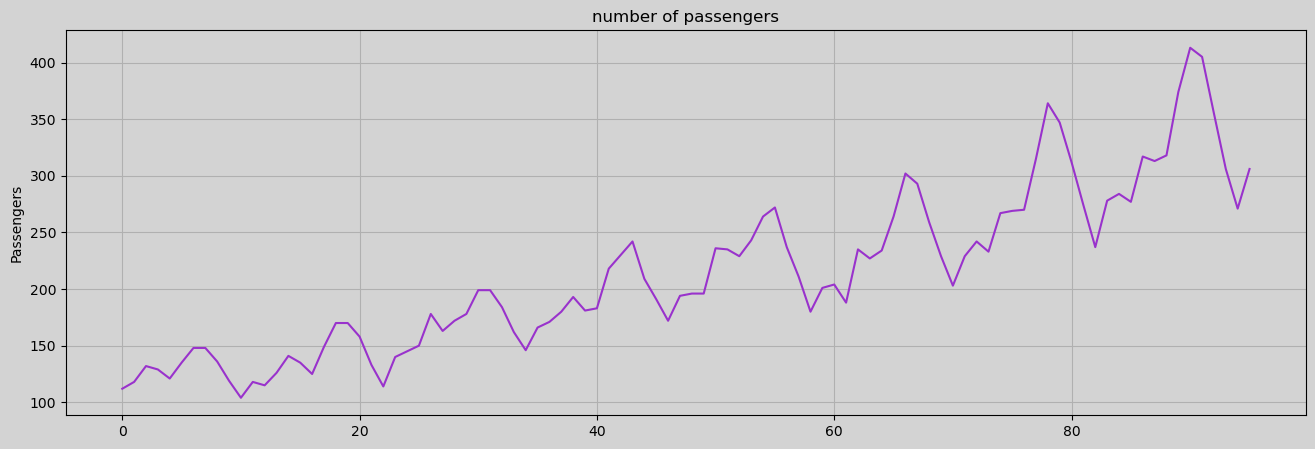

In [85]:
#ok lets see the plots how the power conspution varies with respect to time
plt.figure(facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df['Passengers'].plot(title='number of passengers',figsize=(16,5),c='darkorchid',ylabel='Passengers',grid=True);
#the same as above plot but this is scatter plot to find the distribution of data's

In [86]:
df['Date']=df['Month'].copy()

In [87]:
df

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [88]:
df['t']=df.index+1#adding the time column 

In [89]:
from math import log
df['log_passenger']=np.log(df['Passengers'])#applying log function 
df['tsquare']=df['t']*df['t']#squaring t

In [90]:
df.head()


,Month,Passengers,Date,t,log_passenger,tsquare
0,1995-01-01,112,1995-01-01,1,4.718499,1
1,1995-02-01,118,1995-02-01,2,4.770685,4
2,1995-03-01,132,1995-03-01,3,4.882802,9
3,1995-04-01,129,1995-04-01,4,4.859812,16
4,1995-05-01,121,1995-05-01,5,4.795791,25


In [91]:
df=df.set_index('Date')

In [92]:
df=df.reset_index('Date')

In [93]:
df['Month']=df.Date.dt.strftime('%b')

In [94]:
df.head()

,Date,Month,Passengers,t,log_passenger,tsquare
0,1995-01-01,Jan,112,1,4.718499,1
1,1995-02-01,Feb,118,2,4.770685,4
2,1995-03-01,Mar,132,3,4.882802,9
3,1995-04-01,Apr,129,4,4.859812,16
4,1995-05-01,May,121,5,4.795791,25


In [95]:
months=(pd.get_dummies(df['Month']))
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df = pd.concat([df,months],axis=1)
df.head()

,Date,Month,Passengers,t,log_passenger,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,Jan,112,1,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,Feb,118,2,4.770685,4,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,Mar,132,3,4.882802,9,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,Apr,129,4,4.859812,16,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,May,121,5,4.795791,25,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
df['Year']=df.Date.dt.strftime('%Y')

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

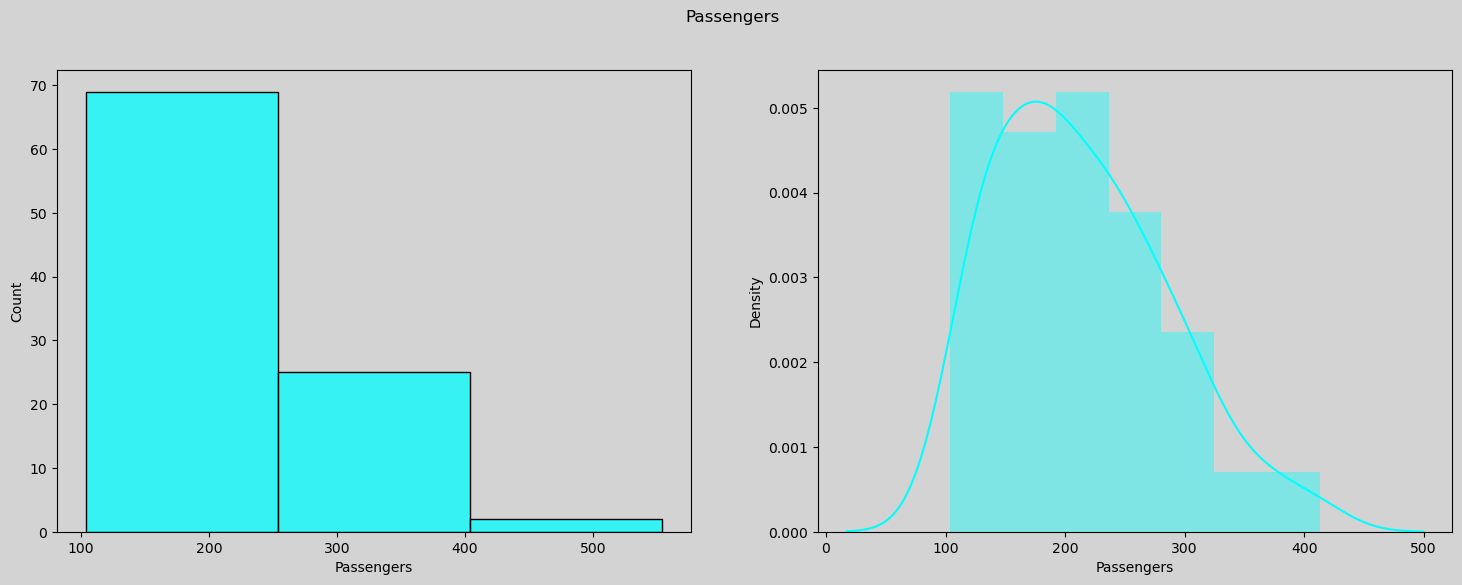

In [97]:
#finding whether the data's are normalliy distributed by visualizing through hist plots
import warnings
warnings.filterwarnings('ignore')
f, axes = plt.subplots(1, 2,figsize=(18, 6),facecolor='lightgrey')
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')
plt.suptitle('Passengers')
sns.histplot(df['Passengers'],color='cyan',binwidth=150,cbar='black',ax=axes[0])
sns.distplot(df['Passengers'],color='cyan',ax=axes[1])

In [100]:
df.head()

,Date,Month,Passengers,t,log_passenger,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,1995-01-01,Jan,112,1,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0,1995
1,1995-02-01,Feb,118,2,4.770685,4,0,1,0,0,0,0,0,0,0,0,0,0,1995
2,1995-03-01,Mar,132,3,4.882802,9,0,0,1,0,0,0,0,0,0,0,0,0,1995
3,1995-04-01,Apr,129,4,4.859812,16,0,0,0,1,0,0,0,0,0,0,0,0,1995
4,1995-05-01,May,121,5,4.795791,25,0,0,0,0,1,0,0,0,0,0,0,0,1995


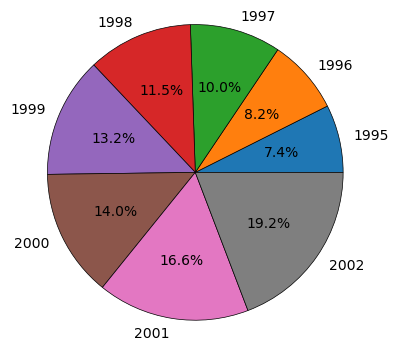

In [101]:
year=df.Year.unique()
value=df.groupby('Year')['Passengers'].mean()
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

plt.figure(figsize=(10,4))
plt.pie(value,autopct = lambda pct: func(pct, df['Passengers']),labels=year,wedgeprops = wp,radius=1.2);


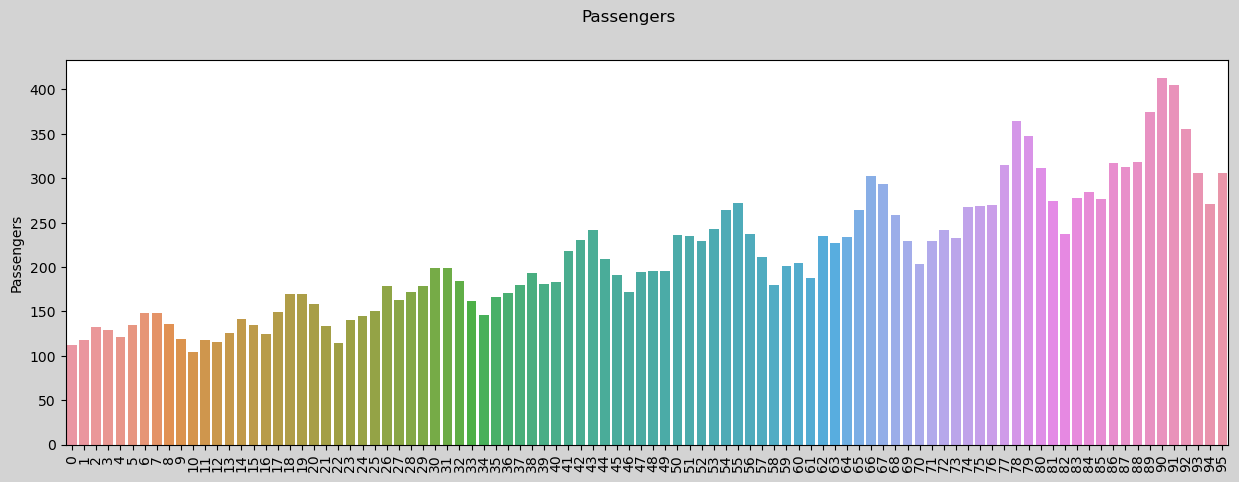

In [102]:
plt.figure(figsize=(15,5),facecolor='lightgrey')
plt.suptitle('Passengers')
sns.barplot(x=df.index,y=df.Passengers)
plt.xticks(rotation=90);

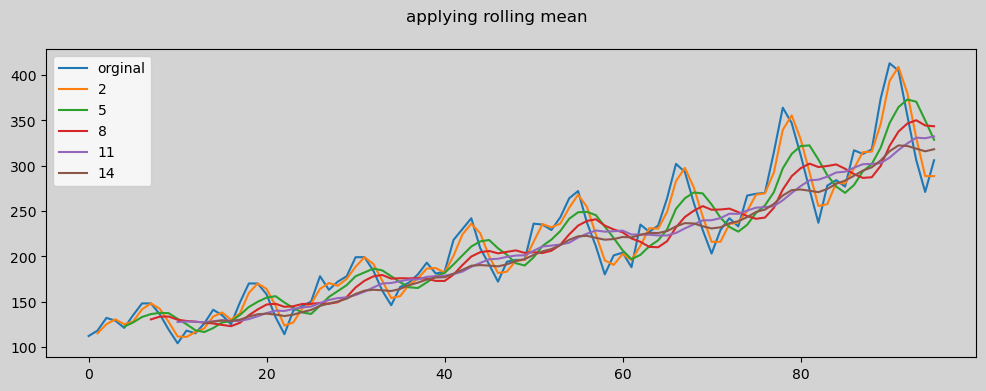

In [104]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
df.Passengers.plot(label="orginal")
for i in range(2,15,3):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.suptitle('applying rolling mean')
plt.legend(loc='best')

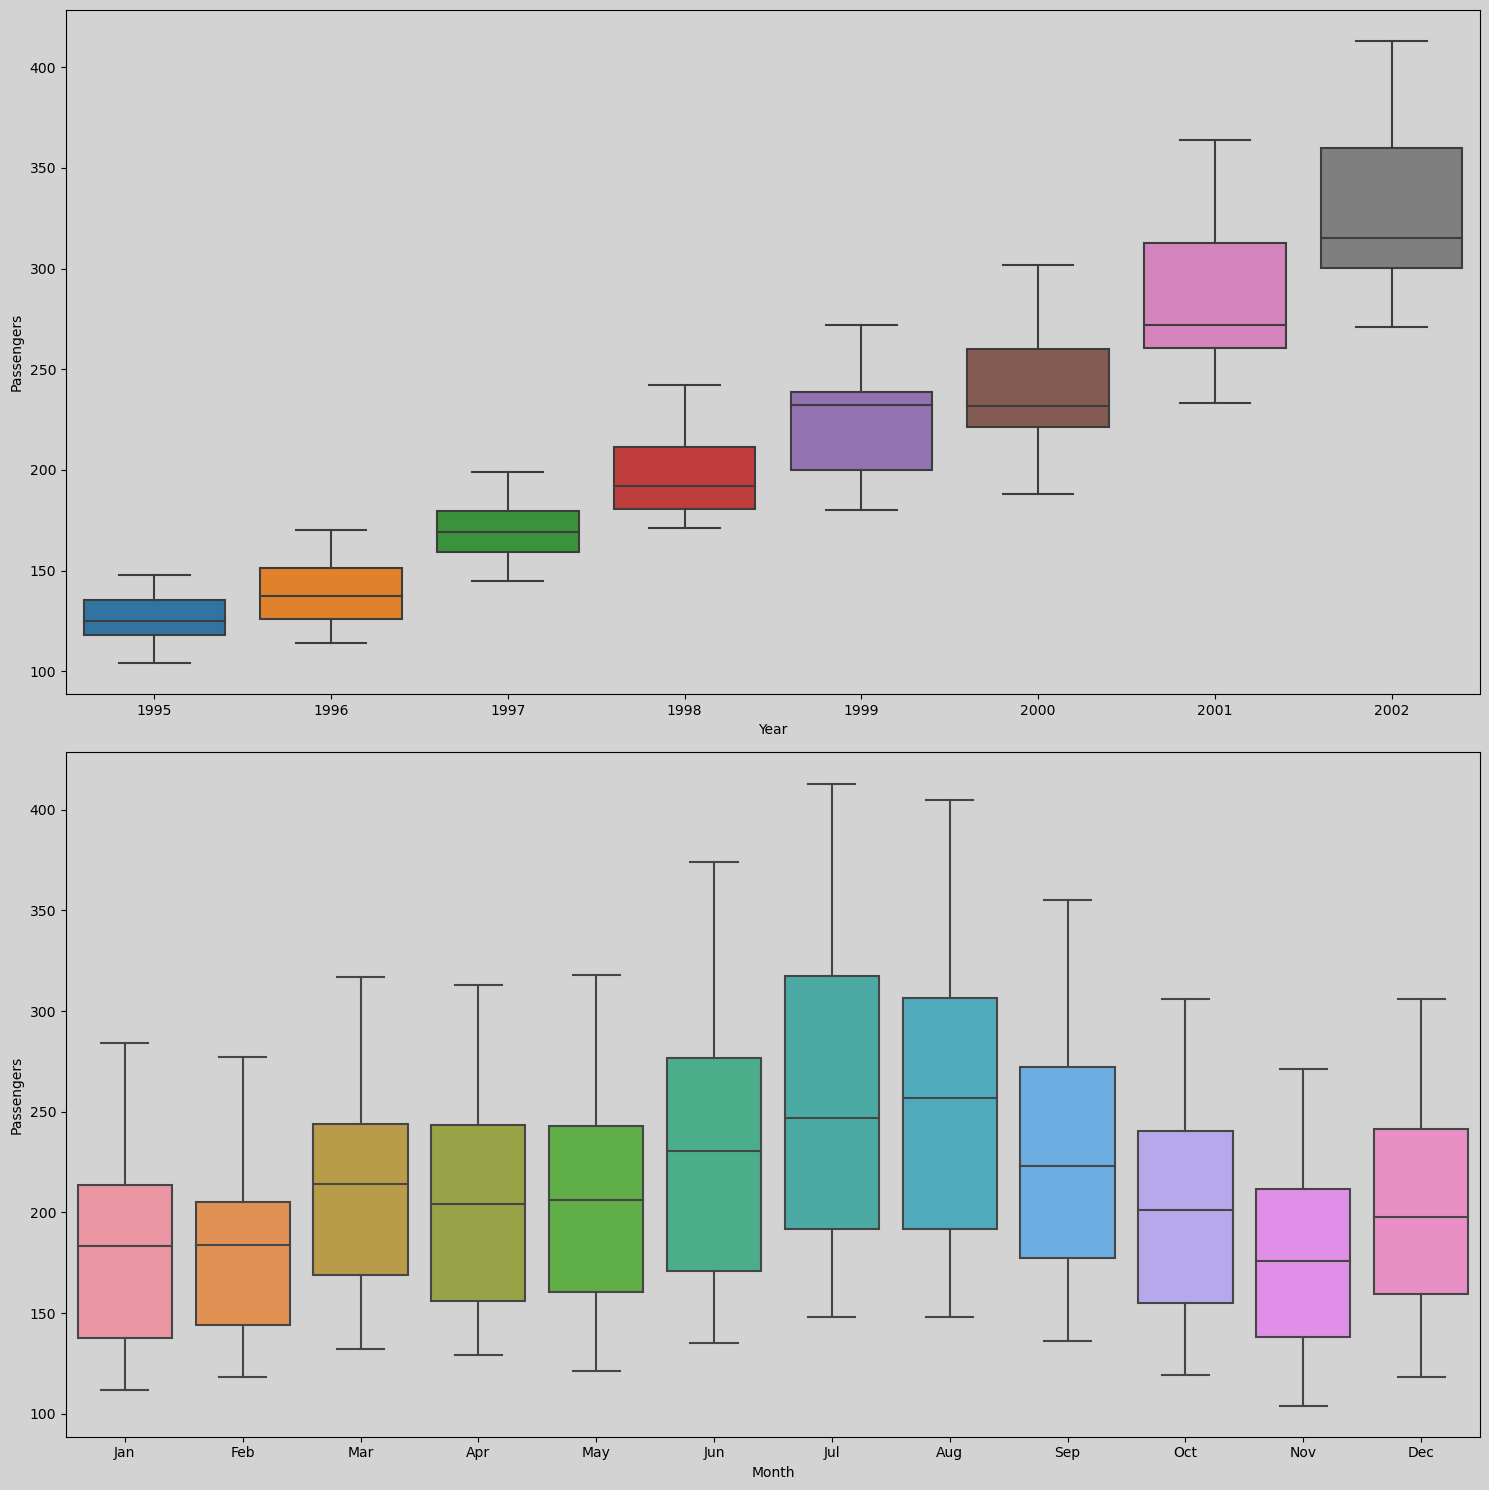

In [106]:
fig, axes = plt.subplots(2,1,figsize=(15, 15),facecolor='lightgrey', sharey=True)
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')

sns.boxplot(ax=axes[0],x=df['Year'],y=df['Passengers'],)
sns.boxplot(ax=axes[1],x=df['Month'],y=df['Passengers'])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

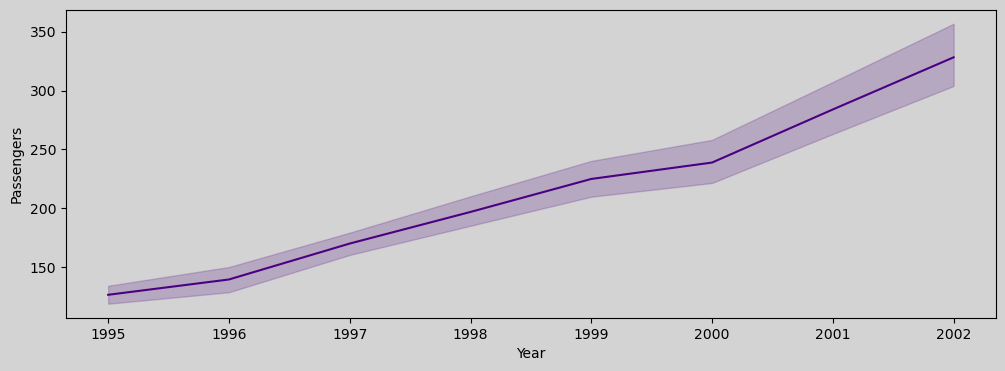

In [108]:
plt.figure(figsize=(12,4),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.lineplot(x="Year",y="Passengers",data=df,color='indigo')

In [121]:
#now lets split the data into two parts
train=df.head(80)
test=df.iloc[81:90]

In [122]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

32.147511722508966

In [123]:
#Exponential

Exp = smf.ols('log_passenger~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


32.350257898465074

In [124]:
#Quadratic 

Quad = smf.ols('Passengers~t+tsquare',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","tsquare"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

32.40910579645426

In [125]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

116.91284522534228

In [126]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','tsquare']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

16.33004865664318

In [127]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

122.83349041576675

In [128]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passenger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.054734870202854

In [129]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.054735
4,rmse_add_sea_quad,16.330049
0,rmse_linear,32.147512
1,rmse_Exp,32.350258
2,rmse_Quad,32.409106
3,rmse_add_sea,116.912845
5,rmse_Mult_sea,122.833490


In [131]:
predict_Data=df.iloc[85:,[0,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]]
predict_Data

,Date,t,log_passenger,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
85,2002-02-01,86,5.624018,0,1,0,0,0,0,0,0,0,0,0,0,2002
86,2002-03-01,87,5.758902,0,0,1,0,0,0,0,0,0,0,0,0,2002
87,2002-04-01,88,5.746203,0,0,0,1,0,0,0,0,0,0,0,0,2002
88,2002-05-01,89,5.762051,0,0,0,0,1,0,0,0,0,0,0,0,2002
89,2002-06-01,90,5.924256,0,0,0,0,0,1,0,0,0,0,0,0,2002
90,2002-07-01,91,6.023448,0,0,0,0,0,0,1,0,0,0,0,0,2002
91,2002-08-01,92,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,2002
92,2002-09-01,93,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,2002
93,2002-10-01,94,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,2002
94,2002-11-01,95,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,2002


In [132]:
model=smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = df.iloc[:85]).fit()


In [133]:
prednew=pd.Series(model.predict(predict_Data))
prednew

85    274.205714
86    301.491429
87    295.348571
88    294.634286
89    318.634286
90    343.634286
91    342.777143
92    317.634286
93    292.491429
94    269.205714
95    293.491429
dtype: float64

In [134]:
predict_Data["forecasted_Passengers"] = pd.Series(prednew)

In [135]:
new_var = pd.concat([df.iloc[:86],predict_Data])
new_var

,Date,Month,Passengers,t,log_passenger,tsquare,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,forecasted_Passengers
0,1995-01-01,Jan,112.0,1,4.718499,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1995,NaN
1,1995-02-01,Feb,118.0,2,4.770685,4.0,0,1,0,0,0,0,0,0,0,0,0,0,1995,NaN
2,1995-03-01,Mar,132.0,3,4.882802,9.0,0,0,1,0,0,0,0,0,0,0,0,0,1995,NaN
3,1995-04-01,Apr,129.0,4,4.859812,16.0,0,0,0,1,0,0,0,0,0,0,0,0,1995,NaN
4,1995-05-01,May,121.0,5,4.795791,25.0,0,0,0,0,1,0,0,0,0,0,0,0,1995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,NaN,NaN,92,6.003887,NaN,0,0,0,0,0,0,0,1,0,0,0,0,2002,342.777143
92,2002-09-01,NaN,NaN,93,5.872118,NaN,0,0,0,0,0,0,0,0,1,0,0,0,2002,317.634286
93,2002-10-01,NaN,NaN,94,5.723585,NaN,0,0,0,0,0,0,0,0,0,1,0,0,2002,292.491429
94,2002-11-01,NaN,NaN,95,5.602119,NaN,0,0,0,0,0,0,0,0,0,0,1,0,2002,269.205714


<AxesSubplot:>

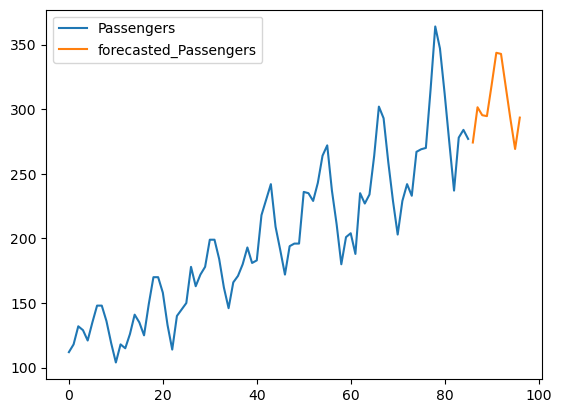

In [136]:
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()